In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import urllib.request
import bz2
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import interp1d





In [2]:
#download puzzles.csv.bz2
url = "https://database.lichess.org/lichess_db_puzzle.csv.bz2"
destfile = "C:/Users/Acer/desktop/magisterka/II semestr/statistical/prace domowe/puzzles.csv.bz2"
urllib.request.urlretrieve(url, destfile)


('C:/Users/Acer/desktop/magisterka/II semestr/statistical/prace domowe/puzzles.csv.bz2',
 <http.client.HTTPMessage at 0x24d431340a0>)

In [3]:
filepath='C:/Users/Acer/desktop/magisterka/II semestr/statistical/prace domowe/puzzles.csv.bz2'
zipfile = bz2.BZ2File(filepath) # open the file
data = zipfile.read() # get the decompressed data
newfilepath = filepath[:-4] # assuming the filepath ends with .bz2
open(newfilepath, 'wb').write(data) # write a uncompressed file

419736699

In [4]:
#read puzzles.csv.bz2

puzzle = pd.read_csv(newfilepath)

#rename columns
puzzle.columns = ["PuzzleId", "FEN", "Moves", "Rating","RatingDeviation",
                           "Popularity", "NbPlays", "Themes","GameUrl"]


In [ ]:
puzzle

In [5]:
#5.	Homework for today: reproduce in Python the plot of puzzle difficulty vs popularity: aggregated scatterplot + LOESS

plays_lo = puzzle['NbPlays'].median()
rating_lo = 1500
rating_hi = puzzle.Rating.quantile(0.99)



In [6]:
row_selector = puzzle.loc[(puzzle['NbPlays'] > plays_lo) & (puzzle['Rating'] < rating_hi) & (puzzle['Rating'] > rating_lo)] 


In [7]:
row_selector

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl
0,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1580,73,97,11995,advantage endgame short,https://lichess.org/F8M8OS71#53
3,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1595,77,88,448,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38
6,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK...,d8f6 d1h5 h7h6 h5c5,1715,74,90,1487,advantage middlegame short,https://lichess.org/jcuxlI63/black#34
7,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...,b7b6 d4a1 a7a5 f1c1,2464,75,91,1180,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40
9,001XA,1qr2rk1/pb2bppp/8/8/2p1N3/P1Bn2P1/2Q2PBP/1R3RK...,b8c7 b1b7 c7b7 e4f6 e7f6 g2b7,1805,75,99,270,crushing discoveredAttack long master middlega...,https://lichess.org/KZRiN695/black#46
...,...,...,...,...,...,...,...,...,...
2440196,zzywe,B3kbnr/p1p2ppp/8/3pp3/3nq3/8/PPPPPP1P/RNBQKR2 ...,c2c4 d4f3,1588,86,81,2339,mate mateIn1 middlegame oneMove pin smotheredMate,https://lichess.org/h2ObbOBC#17
2440199,zzzKH,q6r/5kb1/p3pn1p/1pn4P/2p2B2/P1N5/1PpQ2P1/R3K2R...,d2c2 c5d3 c2d3 c4d3,1650,74,93,1040,crushing fork middlegame short,https://lichess.org/Kite8I8w#45
2440200,zzzLK,rn2k2r/pb3ppp/1p1qpn2/3p4/3P4/2NBPN2/PP3PPP/R2...,b8d7 c3b5 d6b8 a1c1 e8g8 b5c7,1881,74,95,1707,crushing long middlegame quietMove,https://lichess.org/sVDZKwQJ/black#20
2440201,zzzOI,8/6p1/8/2pK3p/1k5P/1P4P1/8/8 b - - 0 43,g7g6 d5c6 c5c4 b3c4 b4c4 c6d6,1931,76,92,3370,crushing defensiveMove endgame long pawnEndgam...,https://lichess.org/f1RiiSwW/black#86


In [8]:
good = row_selector[["Rating", "Popularity"]]

In [9]:
good

,Rating,Popularity
0,1580,97
3,1595,88
6,1715,90
7,2464,91
9,1805,99
...,...,...
2440196,1588,81
2440199,1650,93
2440200,1881,95
2440201,1931,92


In [10]:
#grupowanie 
grouped_good  = good.groupby('Rating')['Popularity'].mean().reset_index()
grouped_good 

,Rating,Popularity
0,1501,91.762313
1,1502,91.993464
2,1503,91.819533
3,1504,91.270855
4,1505,91.579324
...,...,...
1168,2669,89.957265
1169,2670,89.801653
1170,2671,89.427350
1171,2672,89.527273


<AxesSubplot:xlabel='Rating', ylabel='Popularity'>

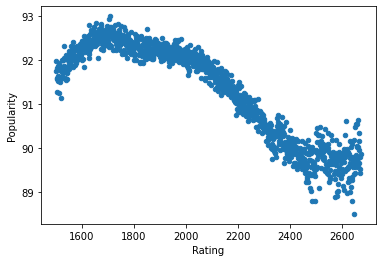

In [11]:
#scatter plot difficulty vs popularity
grouped_good.plot.scatter(x='Rating', y='Popularity')


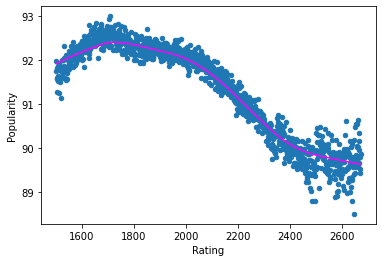

In [12]:
#loess plot
import statsmodels.api as sm
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(grouped_good['Popularity'],grouped_good['Rating'],frac=1./3.,it=3, return_sorted = False)
grouped_good.plot.scatter(x='Rating', y='Popularity')
plt.plot(grouped_good['Rating'],yest_sm,color = 'magenta')